# BME 6310 Homework 05
Nathan LeRoy

## Problem 1
### $w(t) = v(t)\cos(\omega t)$
**Linearity:**  

$\mathscr{S}[av_{1}(t) + bv_{2}(t)] = [av_{1}(t) + bv_{2}(t)]\cos(\omega t)$  

$\mathscr{S}[av_{1}(t)] + \mathscr{S}[bv_{2}(t)] = av_{1}(t)\cos(\omega t) + bv_{2}(t)\cos(\omega t) = [av_{1}(t) + bv_{2}(t)]\cos(\omega t)$

*These are equvalent and thus, the system **is linear**.*

**Shift Invariance:**

$w(t + t_{0}) = v(t+t_{0})\cos(\omega (t+t_{0}))$

let: $r(t) = v(t+t_{0})$

$\mathscr{S}[r(t)] = r(t)\cos(\omega (t)) = v(t+t_{0})\cos(\omega t)$  

*These are **not** equivalent, this the system is **not shift invariant**.*

### $w(t) = \sin(v(t))$
**Linearity:**

$\mathscr{S}[av_{1}(t) + bv_{2}(t)] = \sin(av_{1}(t) + bv_{2}(t))$

$\mathscr{S}[av_{1}(t)] + \mathscr{S}[bv_{2}(t)] = \sin(av_{1}(t)) + \sin(bv_{2}(t))$

*These are **not** equivalent and thus the system is **not linear**.*

**Shift invariance:**

$w(t+t_{0}) = \sin(v(t + t_{0}))$

let: $r(t) = v(t+t_{0})$

$\mathscr{S}[r(t)] = \sin(r(t)) = \sin(v(t+t_{0}))$

*These are equivalent and thus, the system is **shift invariant**.*

### $w(t) = \dfrac{d}{dt}v(t)$
**Linearity:**

$\mathscr{S}[av_{1}(t) + bv_{2}(t)] = \dfrac{d}{dt}(av_{1}(t) + bv_{2}(t)) = a\dfrac{dv_{1}}{dt} + b\dfrac{dv_{2}}{dt}$

$\mathscr{S}[av_{1}(t)] + \mathscr{S}[bv_{2}(t)] = \dfrac{d}{dt}av_{1}(t) + \dfrac{d}{dt}bv_{2}(t) = a\dfrac{dv_{1}}{dt} + b\dfrac{dv_{2}}{dt}$

*These are equivalent and thus the system **is linear**.*

**Shift invariance:**

$w(t+t_{0}) =\dfrac{d}{dt}v(t+t_{0})$

let: $r(t) = v(t+t_{0})$

$\mathscr{S}[r(t)] =\dfrac{d}{dt}r(t) = \dfrac{dr}{dt} = \dfrac{d}{dt}v(t+t_{0})$

*These are equivalent and this, the system **is shift invariant**.*

### $w(t) = \cos(\omega t + v(t))$
**Linearity:**

$\mathscr{S}[av_{1}(t) + bv_{2}(t)] = \cos(\omega t + av_{1}(t) + bv_{2}(t))$

$\mathscr{S}[av_{1}(t)] + \mathscr{S}[bv_{2}(t)] = \cos(\omega t + av_{1}(t)) + \cos(\omega t + v_{2}(t))$

*These are **not equivalent** and thus, the system is **not linear**.*

**Shift invariance:**

$w(t+t_{0}) = \cos(\omega (t+t_{0}) + v(t+t_{0}))$

let: $r(t) = v(t+t_{0})$

$\mathscr{S}[r(t)] = \cos(\omega t + r(t)) = \cos(\omega t + v(t+t_{0}))$

*These are **not equivalent** and thus, the system is **not shift invariant**.*

## Problem 2
Import the systems from the `.pyc` file:

In [52]:
# better image quality
import matplotlib as mpl 
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 300

In [53]:
import numpy as np
from systems_hw5 import *
import matplotlib.pyplot as plt

Lets create a function to display some plots for us that can generate an "eye test" for linearity:

In [54]:
from typing import Callable
def test_linearity(system: Callable) -> None:
    """
    Function to display plots that will test for
    a system's linearity. Given a system, this
    function will plot 3 plots:
        1.) original system
        2.) plot with homogeneity test
        3.) plot with additivity test
    """

    _, ax = plt.subplots(1,3, figsize=(20,6), sharex=False, sharey=True)

    # investigate system
    v = np.zeros(41)
    v[20] = 1
    w = system(v) 
    ax[0].stem(
        w,   
        linefmt='b-', 
        markerfmt="bo",
        basefmt="b-",
    )
    ax[0].set_title("$v(t)$")
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Output")

    # test homogeneity
    ax[1].stem(system(2*v), 
        linefmt='b-', 
        markerfmt="bo",
        basefmt="b-",
        label="$\mathscr{S}(2v(t))$"
    )
    ax[1].stem(2*system(v), 
        linefmt='r-', 
        markerfmt="ro",
        basefmt="r-", 
        label="$2\mathscr{S}(v(t))$"
    )
    ax[1].set_title("Homogeneity")
    ax[1].set_xlabel("Time")
    ax[1].legend(loc='upper right', ncol=1)

    # test additivity
    v2 = np.zeros(41)
    v2[20] = 2
    ax[2].stem(system(v + v2), 
        linefmt='b-', 
        markerfmt="bo",
        basefmt="b-",
        label="$\mathscr{S}(v_{1}(t) + v_{2}(t))$"
    )
    ax[2].stem(system(v) + system(v2), 
        linefmt='r-', 
        markerfmt="ro",
        basefmt="r-",  
        label="$\mathscr{S}(v_{1}(t)) + \mathscr{S}(v_{2}(t))$"
    )
    ax[2].set_title("Additivity")
    ax[2].set_xlabel("Time")
    ax[2].legend(loc='upper right', ncol=1)

Similarly, we can define a function that will test for shift invariance of a system:

In [55]:
def test_shift_invariance(system: Callable) -> None:
    """
    A simple function to test for a system's
    shift invariance by generating two plots:
        1.) Original system
        2.) system shifted over
    """
    plt.rcParams["figure.figsize"] = (6,3)
    v = np.zeros(41)
    v[20] = 1
    w = system(v)

    v_shift = np.zeros(41)
    v_shift[25] = 1
    w_shift = system(v_shift)

    plt.stem(
        w,
        linefmt='b-', 
        markerfmt="bo",
        basefmt="b-",
        label="$\mathscr{S}(v(t))$",
    )
    plt.stem(
        w_shift,
        linefmt='r-', 
        markerfmt="ro",
        basefmt="r-",
        label="$\mathscr{S}(v(t-t_{0}))$"
    )
    plt.xlabel("Time")
    plt.ylabel("Output")
    plt.legend()

Lets test our systems.

### SystemA
**Linearity:**

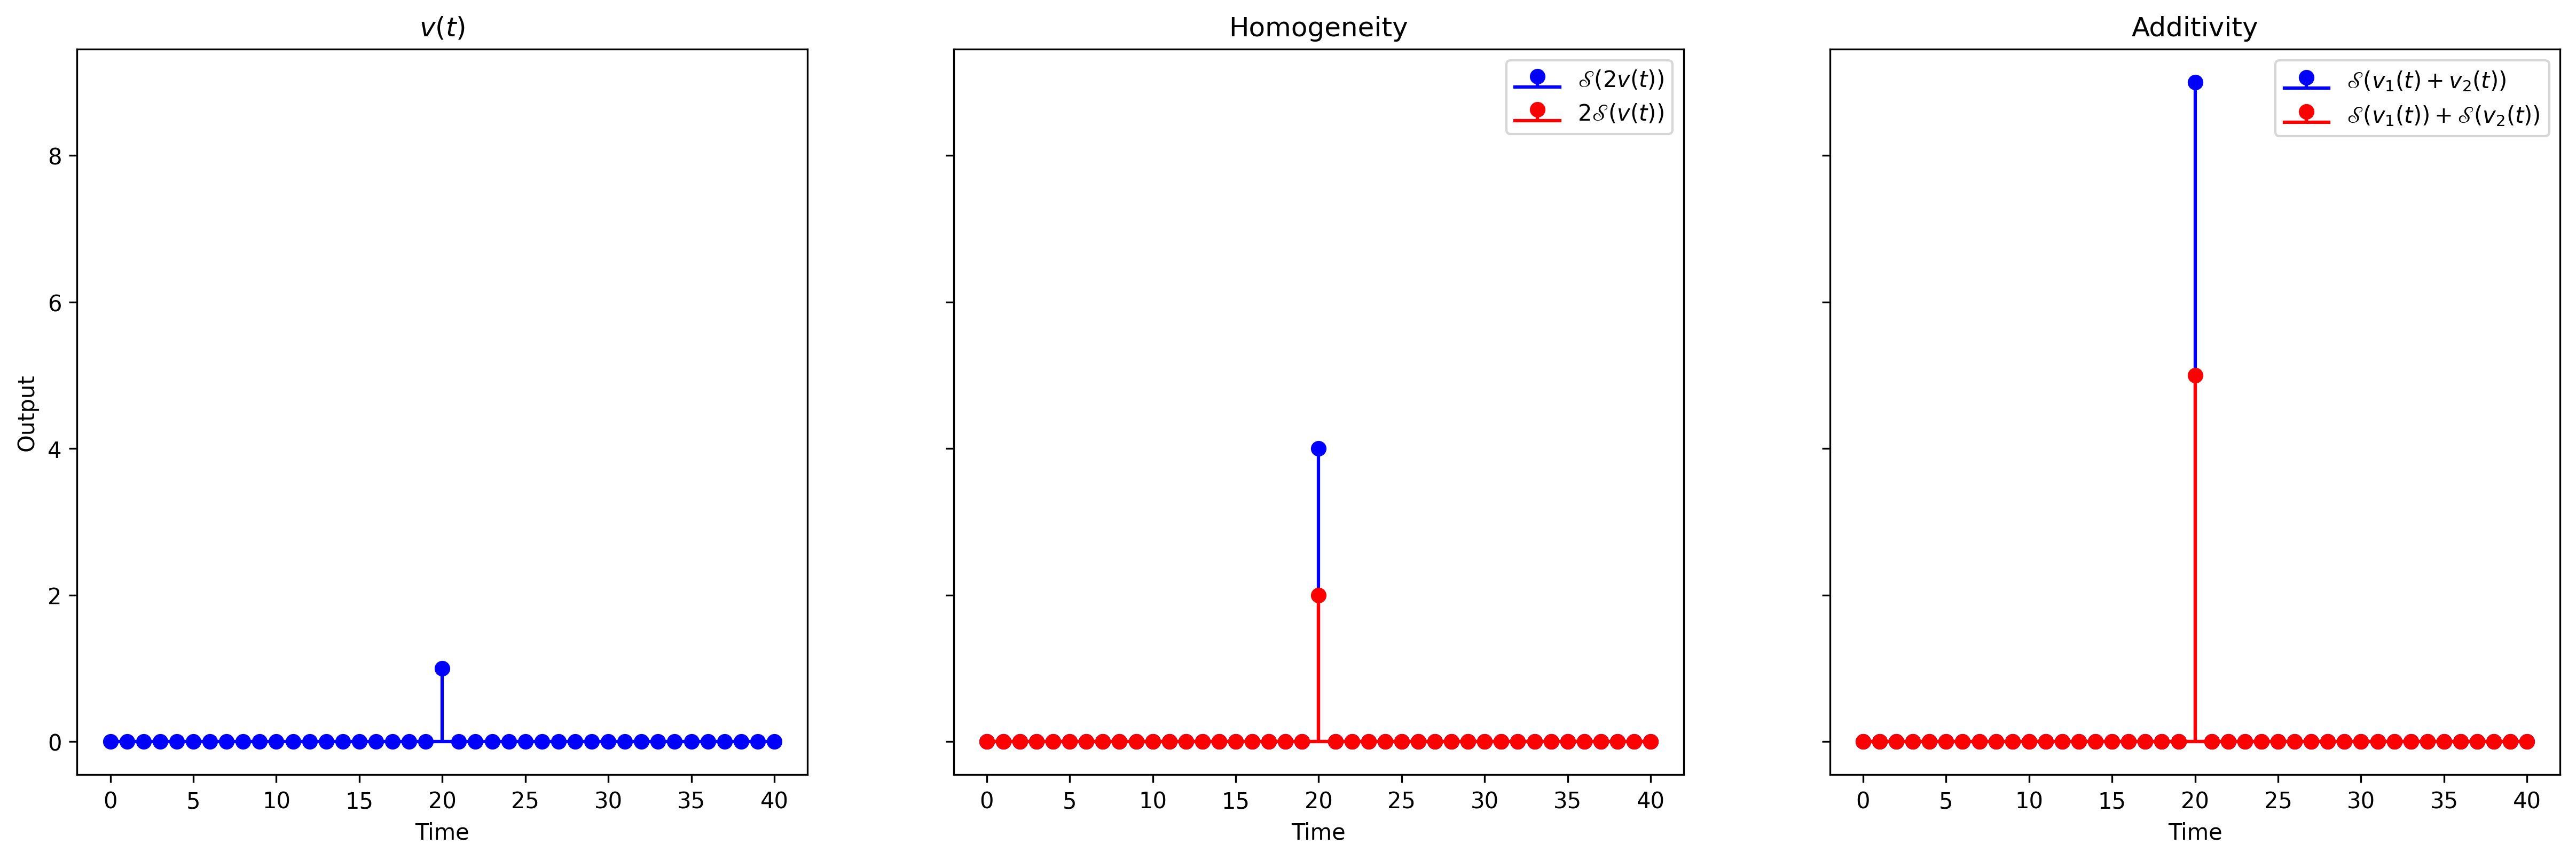

In [56]:
test_linearity(systemA)

We can see that our system produces **two different** outputs based on the order in which inputs are either added or scaled. From this. We can infer that the system is **not linear**.

**Shift invariance:**

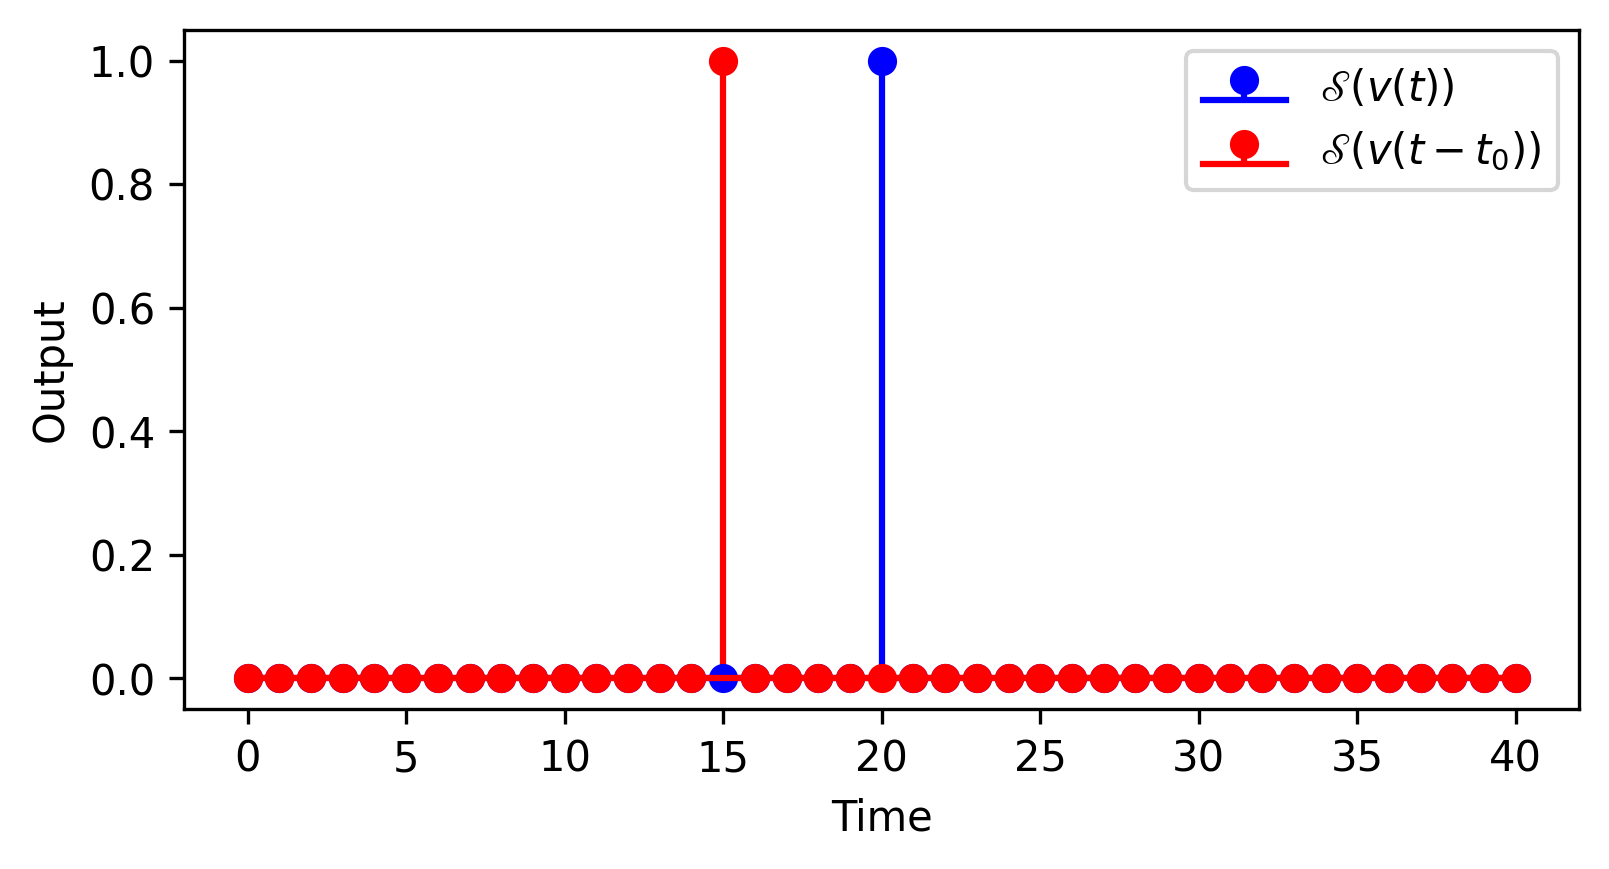

In [57]:
test_shift_invariance(systemA)

From the original and shift profile's, we can infer that the system is **shift invariant**.

### SystemB
**Linearity:**

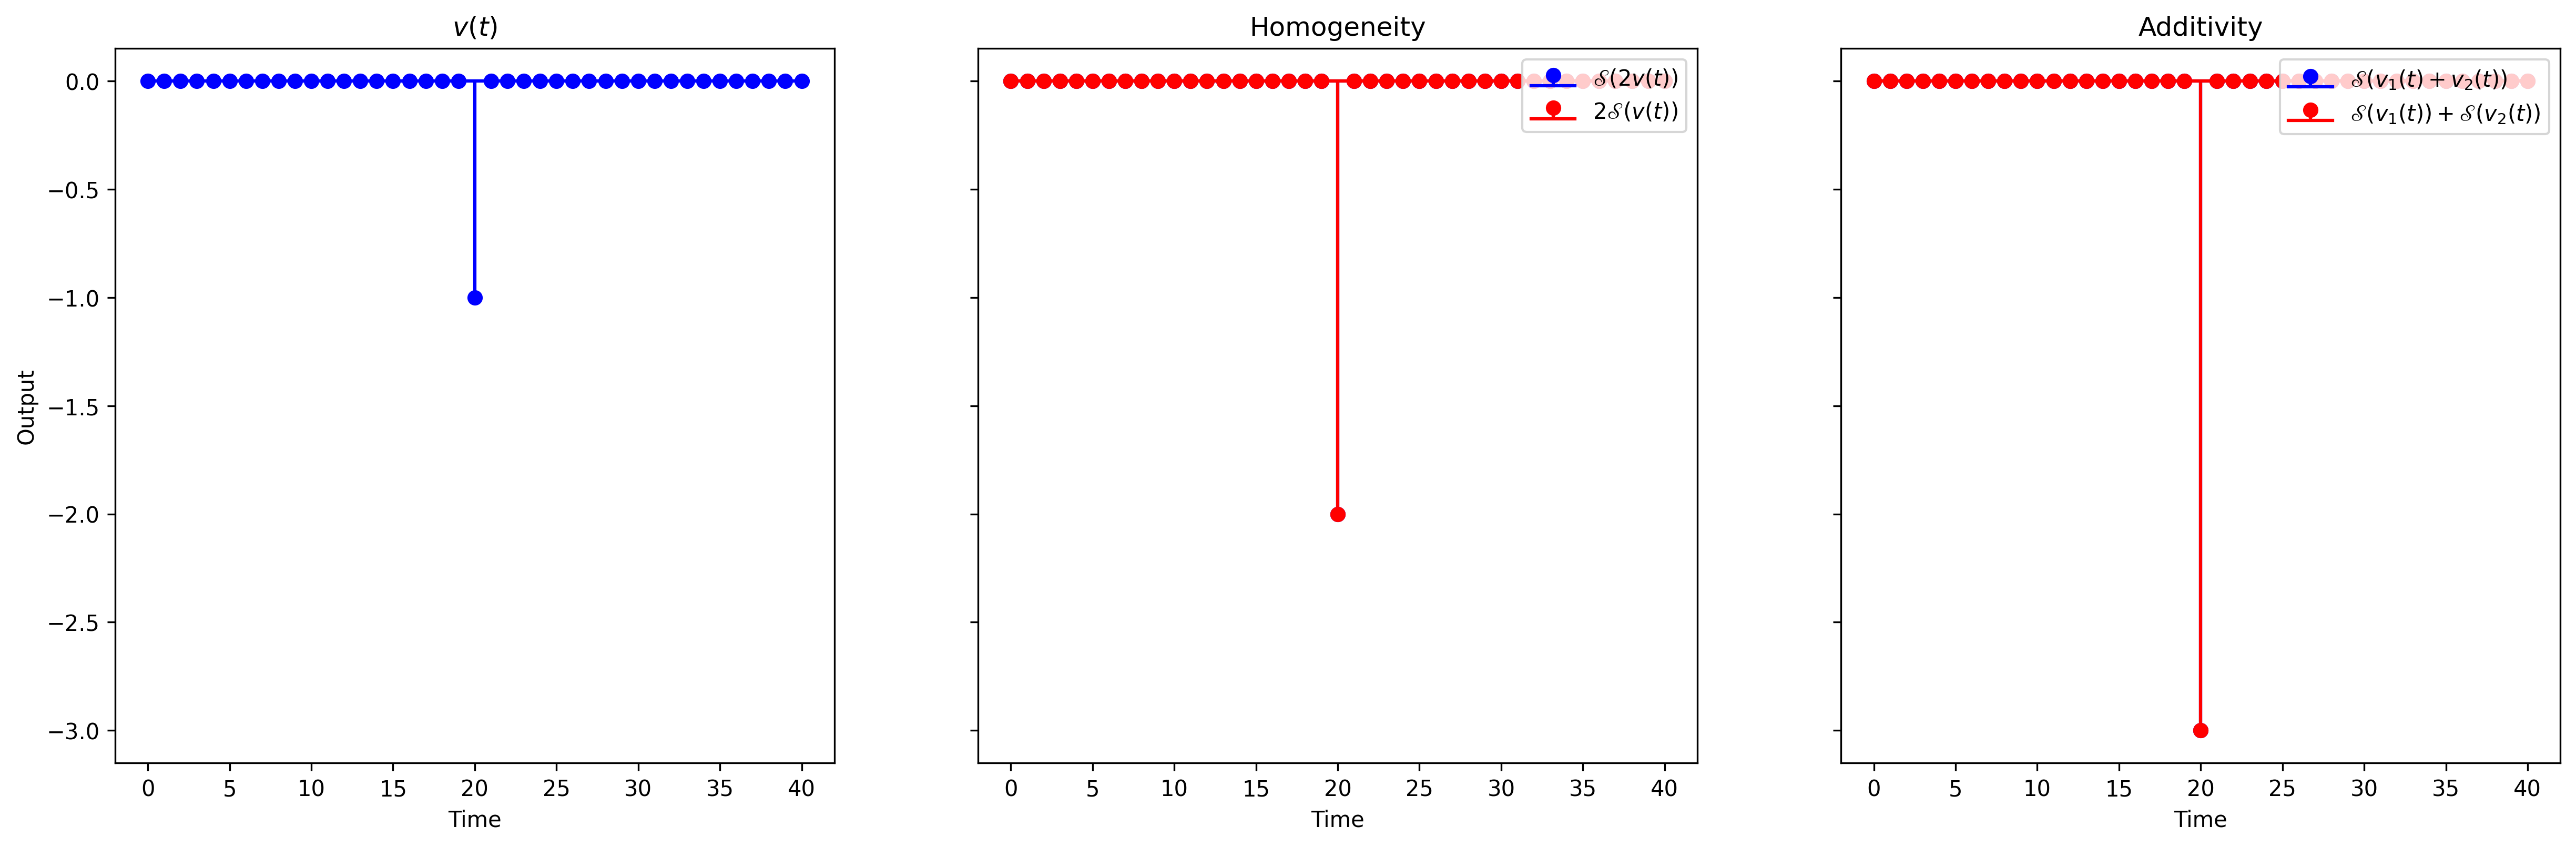

In [58]:
test_linearity(systemB)

We can see that the plots perfectly overlap for but the homogeneity and additivity tests. Thus, our system can be inferred as **linear**.

**Shift invariance:**

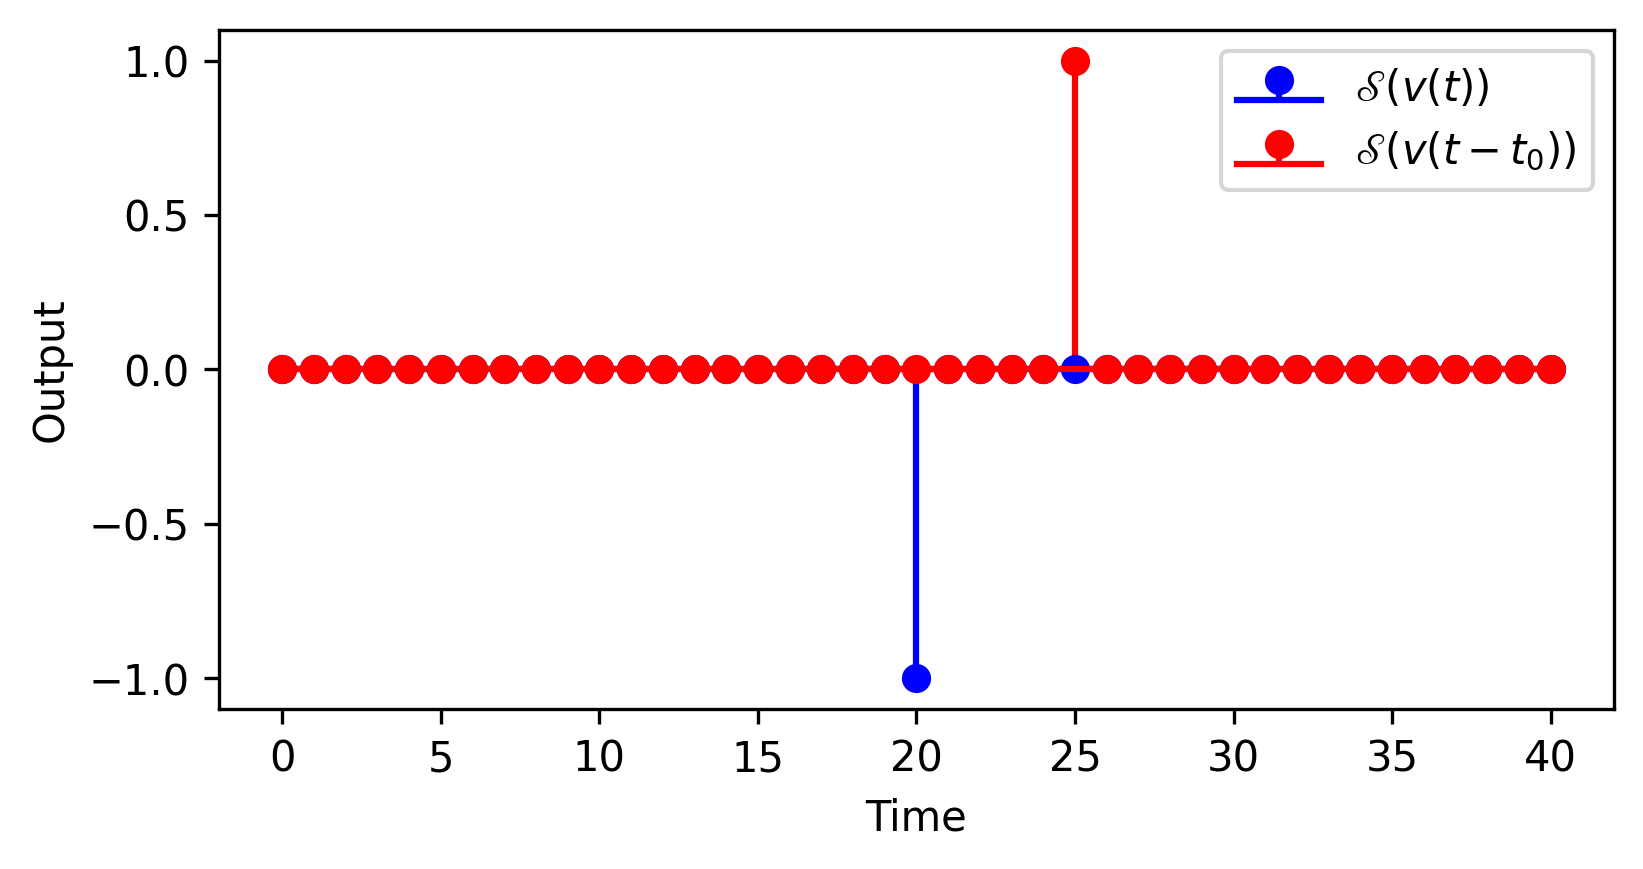

In [59]:
test_shift_invariance(systemB)

Based on the original and shifted profiles, it would appear that the system is **not shift invariant:**

### SystemC
**Linearity:**

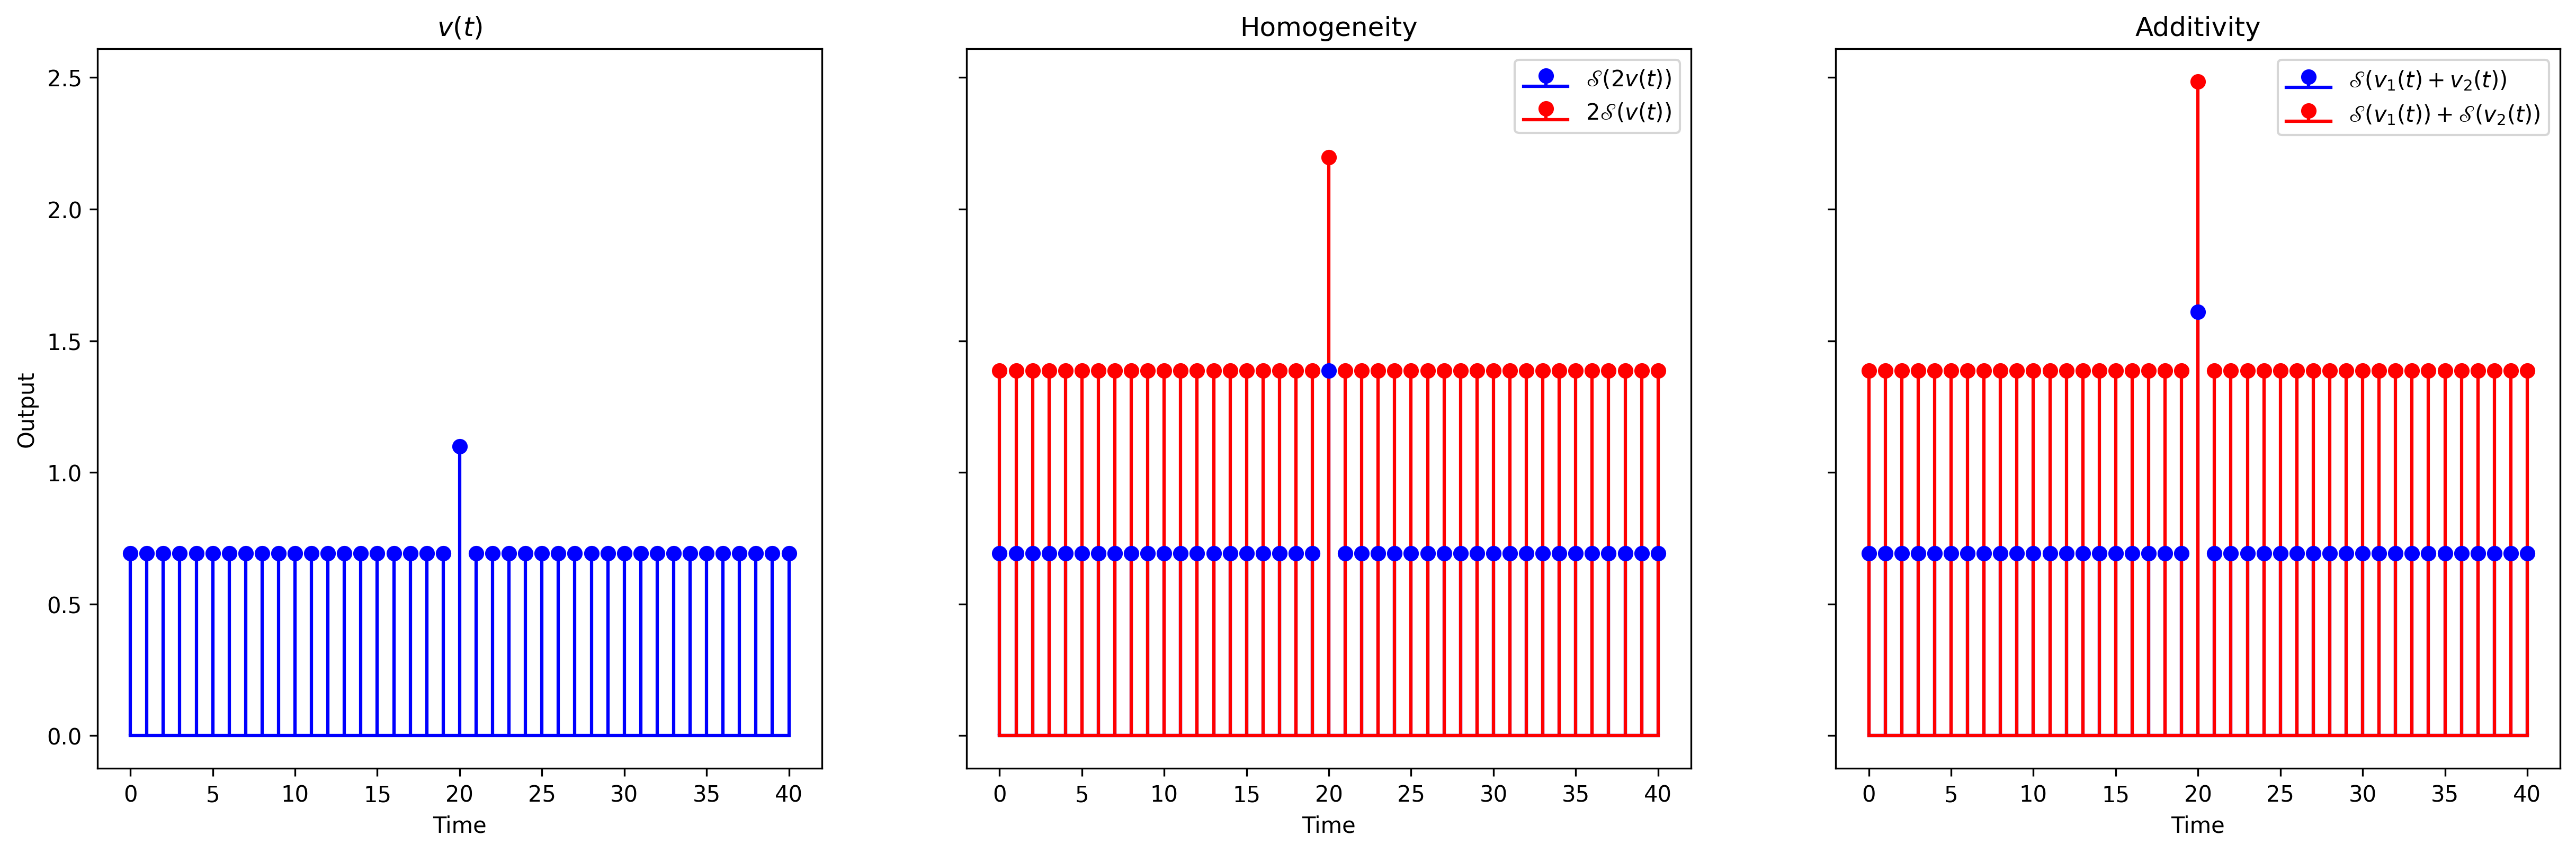

In [60]:
test_linearity(systemC)

We can see that for the system both homogenity and additivity tests fail. Thus, the system can beinferred as **non linear**.

**Shift invariance:**

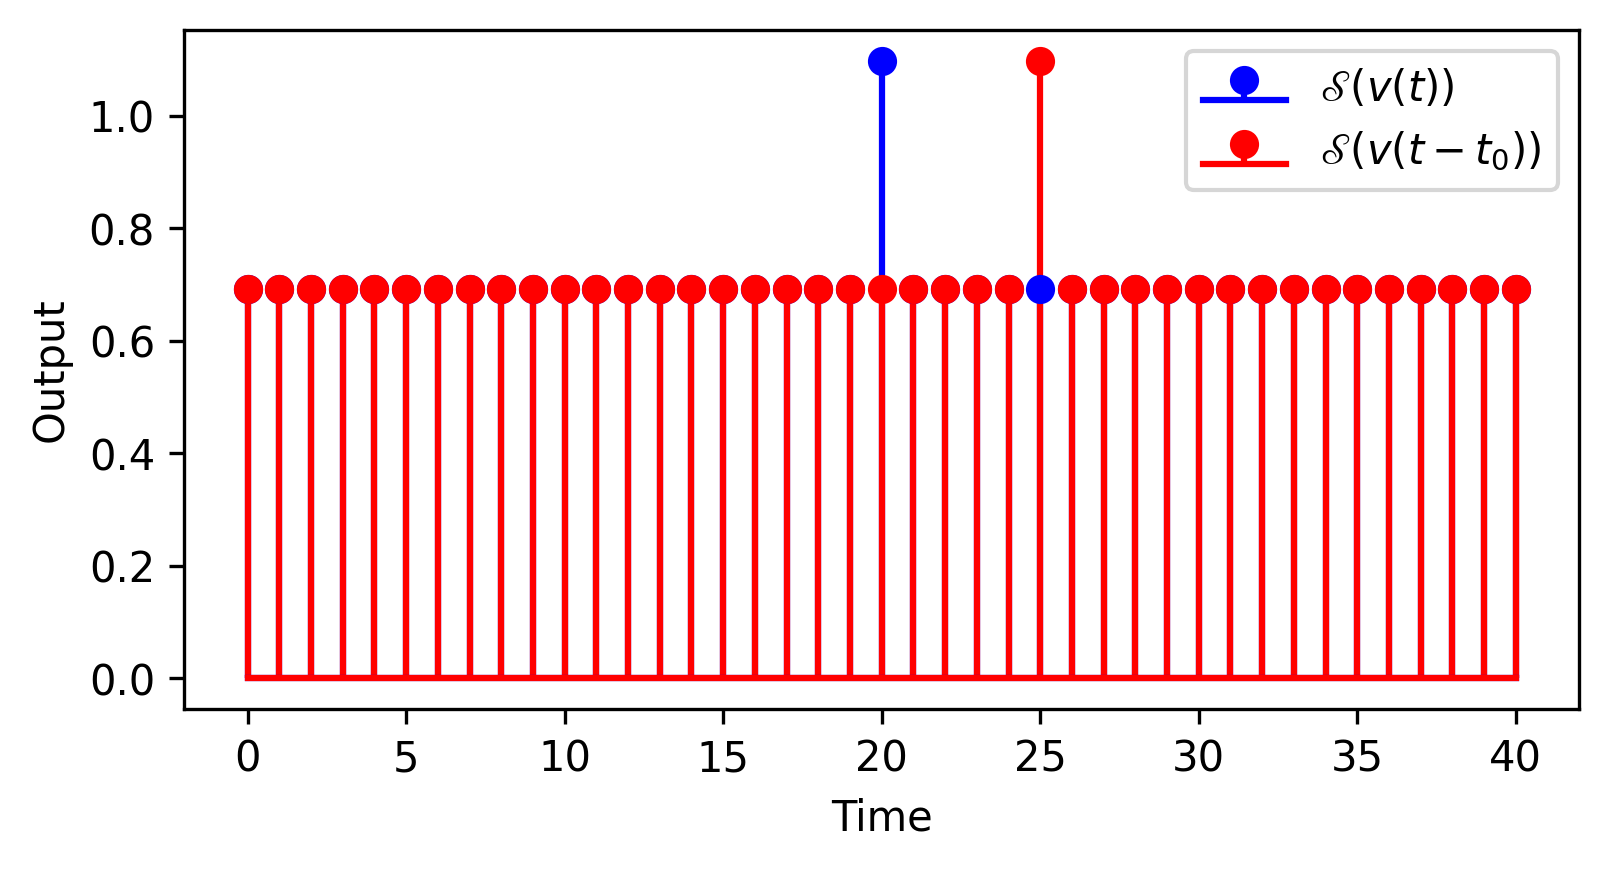

In [61]:
test_shift_invariance(systemC)

Based on the original and shifted profiles, we can infer that the system is **shift invariant**.

### SystemD
**Linearity:**

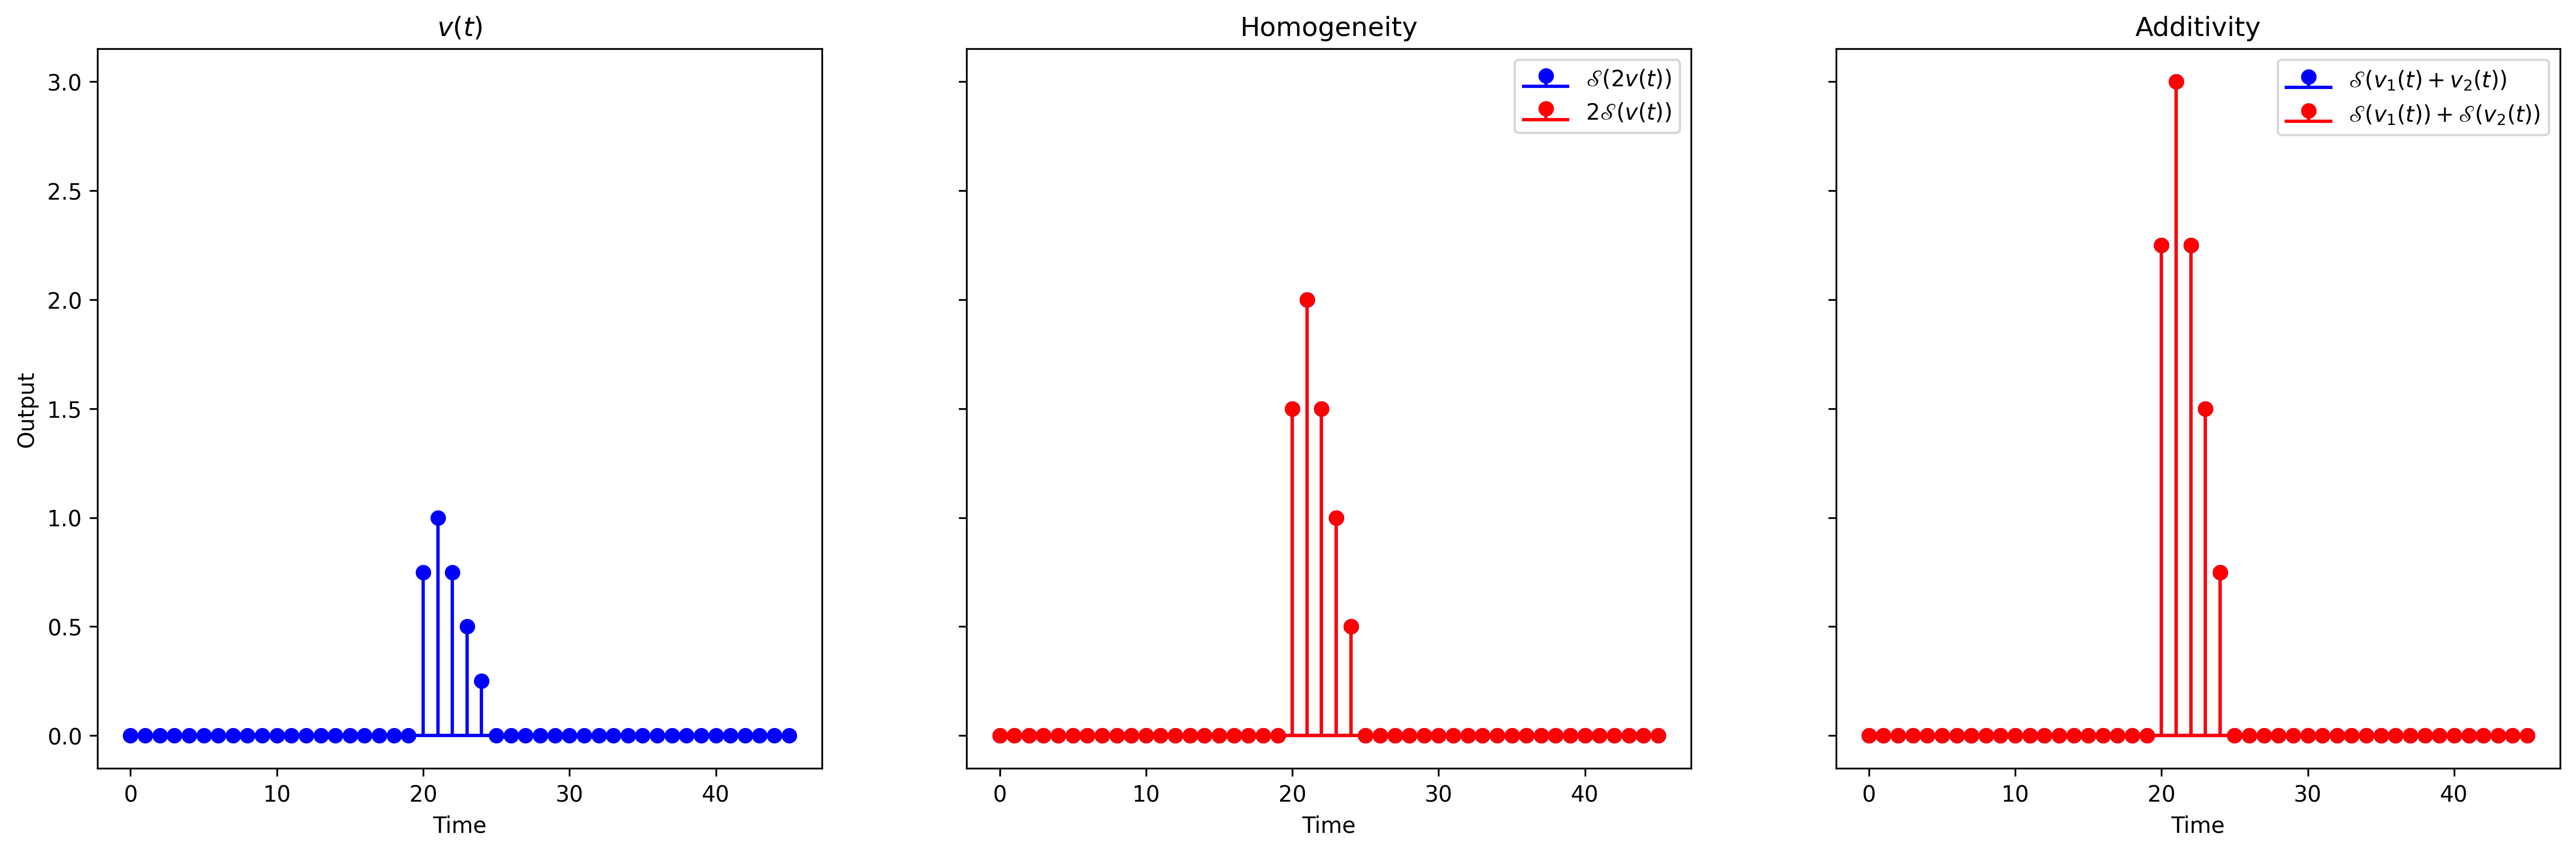

In [62]:
test_linearity(systemD)

From the plots, we can see the system satisfies both the homogeneiety and addivity requirements. Our system **is linear**.

**Shift invariance:**


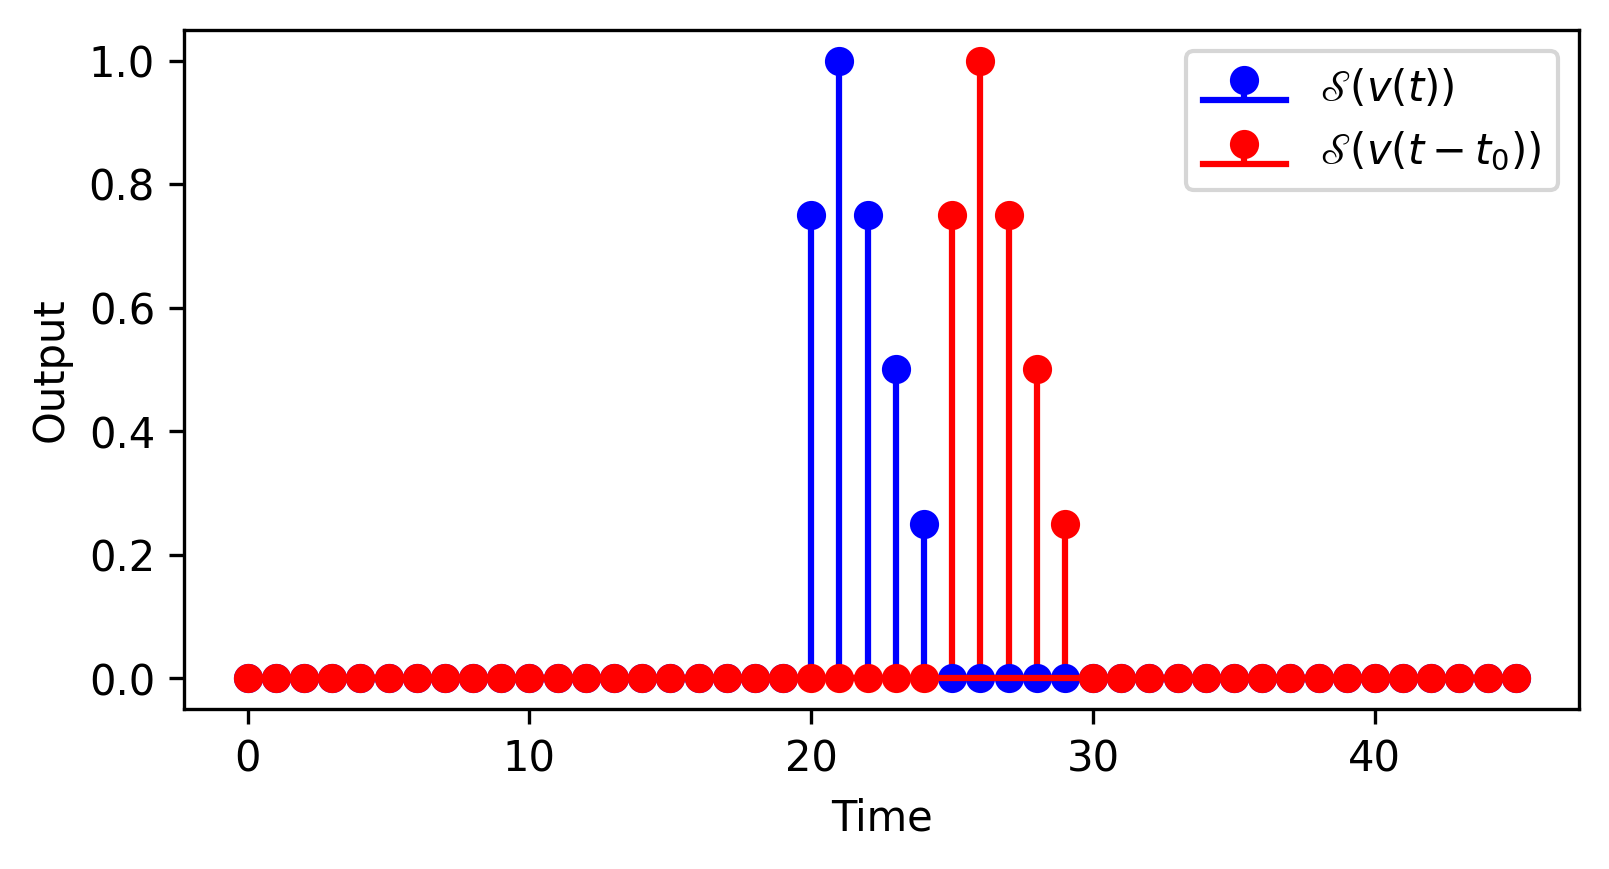

In [63]:
test_shift_invariance(systemD)

Again, by looking at the original and shifted plots, we can see that the system is **shift invariant**.

## Problem 3
We can assume that any function can be broken up into **even and odd** parts like so:

$f(x) = E(x) + O(x)$

where,

$E(x) = \dfrac{f(x) + f(-x)}{2}$  and  $O(x) = \dfrac{f(x) - f(-x)}{2}$

### a.) $g(x) = (x^{3} + x^{2})\cos(\pi x)$

$g_{e}(x) = \dfrac{g(x) + g(-x)}{2} = \dfrac{(x^{2} - x^{3})\cos(\pi x) + (x^{2} - x^{3}cos(-\pi x)}{2}$

We know that $\cos(-x) = \cos(x)$. As such the top equation can be drastically simplified:

$g_{e}(x) = \dfrac{x^{2}\cos(\pi x) - x^{3}\cos(\pi x) + x^{2}\cos(\pi x) + x^{3}\cos(\pi x)}{2}$

which simplifies to:

$g_{e}(x) = x^{2}\cos(\pi x)$**.

Similarly, we can calculate the odd part of $g(x)$:

$g_{o}(x) = \dfrac{g(x) - g(-x)}{2} = \dfrac{(x^{3} + x^{2})\cos(\pi x) - (x^{2} - x^{3})\cos(-\pi x)}{2}$

We know that $\cos(-x) = \cos(x)$. As such the top equation can be drastically simplified:

$g_{o}(x) = \dfrac{x^{3}\cos(\pi x) + x^{2}\cos(\pi x) - x^{2}\cos(\pi x) + x^{3}\cos(\pi x)}{2}$

$g_{e}(x) = \dfrac{x^{3}\cos(\pi x) + x^{3}\cos(\pi x)}{2}$

$g_{e}(x) = x^{3}\cos(\pi x)$

### b.) Piecewise
From the graph we can see that our function is the following piecewise function:

$$
f(x) = \begin{array}{cc}
  \Bigg \{ & 
    \begin{array}{cc}
      -x - 1 & -1 \leq x \leq 0 \\
      x & 0 \leq x \leq 1
    \end{array}
\end{array}
$$

We can test each section of the piecewise function for both even an odd parts using the following criteria:

### Even functions:
$f(x) = f(-x)$

For the first section...

$f(x) = -x - 1$

$f(-x) = x-1$

These are not the same -- they are not even.

For the second section...

$f(x) = x$

$f(-x) = -x$

**Neither** of these sections are even. The function has **no even parts**.

### Odd functions:
$f(-x) = -f(x)$

For the first section:

$f(-x) = x - 1$

$-f(x) = -(-x - 1) = x + 1$

For the second section:

$f(-x) = -x$

$-f(x) = -x$

These are identical. The first section is not. Thus, the function is **odd only on the interval $[0, 1]$**.

## Problem 5
Here is the sketched $b(t)$ and $x(t)$:

![Sketches of graphs of $b(t)$ and $x(t)$](figs/b_t_x_t.png)

We can break down $x(t)$ into a linear combination of $b(t)$ that takes on the form: 

$x(t) = a_{1}b(t-s_{1}) + a_{2}b(t-s_{2}) + a_{3}b(t-s_{3})$

We can combine the following 3 transformations of $b(t)$ to acheive this:

$(-1)b(t-1)$,

$2b(t-2)$,

$2b(t-3)$

$x(t) = (-1)b(t-1) + 2b(t-2) + 2b(t-3)$

We can sketch these 3 components here:

![Individual components of $x(t)$](figs/x_t_broken_down.png)